Firefly Algorithm

Name : Dawwi Raissa Damarjati Muljana
SID : 1301213517

Kode

In [12]:
#importing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

Fungsi F14

In [18]:
# Define the F14 function
def F14(x, a):
    term1 = 1 / 500
    term2 = 0
    for j in range(1, 26):
        inner_sum = 0
        for i in range(1, 3):
            inner_sum += (x[i-1] - a[i-1][j-1])**6
        term2 += j / (inner_sum)
    result = (term1 + term2)**(-1)
    return result

In [7]:
# Firefly Algorithm parameters
n = 25  # number of fireflies
max_gen = 50  # maximum number of generations
alpha = 0.5  # randomness strength
beta0 = 1.0  # attractiveness constant
gamma = 1.0  # absorption coefficient

In [8]:
# Initialize fireflies
fireflies = np.random.uniform(-50, 100, (n, 2))
fitness = np.array([F14(firefly) for firefly in fireflies])

# To store the positions for animation
positions_firefly = []

In [9]:
# Firefly Algorithm
for gen in range(max_gen):
    positions_firefly.append(fireflies.copy())
    for i in range(n):
        for j in range(n):
            if fitness[j] < fitness[i]:
                r = np.linalg.norm(fireflies[i] - fireflies[j])
                beta = beta0 * np.exp(-gamma * r**2)
                fireflies[i] += beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(2) - 0.5)
                fireflies[i] = np.clip(fireflies[i], -50, 100)
                fitness[i] = F14(fireflies[i])

positions_firefly.append(fireflies.copy())

In [10]:
# Result
best_firefly = fireflies[np.argmin(fitness)]
best_fitness = np.min(fitness)

print(f'Best position (Firefly Algorithm): {best_firefly}')
print(f'Best fitness (Firefly Algorithm): {best_fitness}')

Best position (Firefly Algorithm): [ 29.1323568  -37.76096547]
Best fitness (Firefly Algorithm): 468.4550321952058


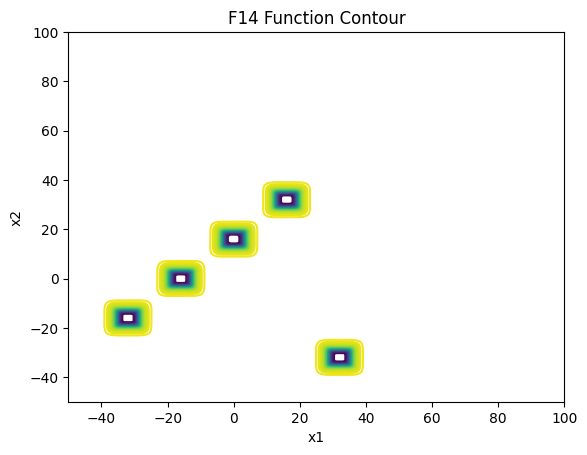

In [11]:
# Plotting the contour of F14 function
x = np.linspace(-50, 100, 200)
y = np.linspace(-50, 100, 200)
X, Y = np.meshgrid(x, y)
Z = np.array([F14([i, j]) for i, j in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

plt.contour(X, Y, Z, levels=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('F14 Function Contour')
plt.show()

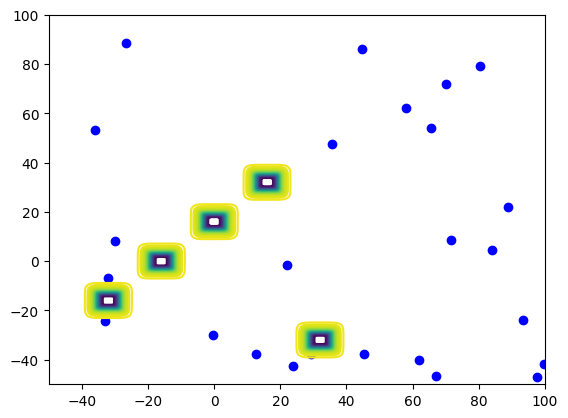

In [13]:
# Firefly Algorithm animation
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=50)

scat = ax.scatter(fireflies[:, 0], fireflies[:, 1], c='blue')

def update_firefly(frame):
    scat.set_offsets(positions_firefly[frame])
    return scat,

ani_firefly = FuncAnimation(fig, update_firefly, frames=len(positions_firefly), interval=200, blit=True)
ani_firefly.save('firefly_algorithm.gif', writer=PillowWriter(fps=5))